In [3]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos((2 * np.pi * np.asarray(x) / (b - a)) ** 2) * 2 * np.pi * np.asarray(x) / (b - a), axis=0)


f = exact

In [4]:
# Parameters
d = 2
k = 1
delta = 0.6
N = 51

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.InterpolationSolver(phi)
approx = solver.solve(f)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

/home/keane/Projects/radiant/venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


L2 Relative Error: 0.012767461797365473
Condition Number: 3358226.608793296


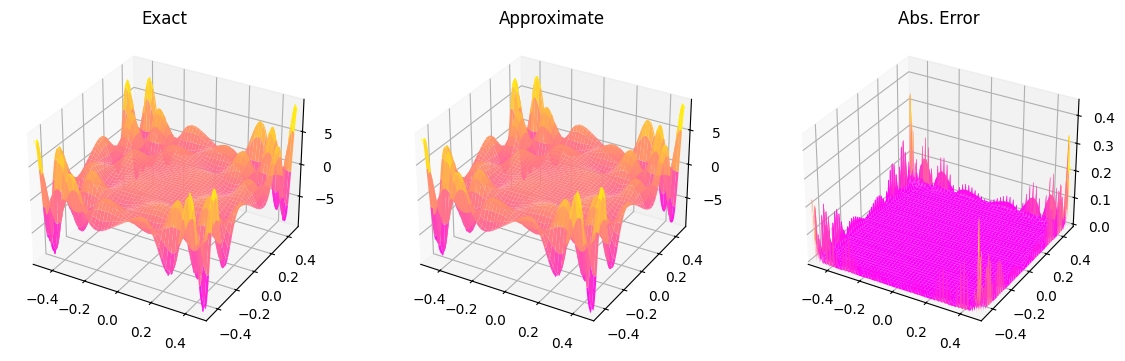

In [5]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x)),
    n=200,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4)
)